<a href="https://colab.research.google.com/github/Sachin44-ux/Machine-learning/blob/main/Stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [461]:
df = pd.read_csv('/content/Stress Dataset _ Tutorial-1.csv')

In [462]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               50000 non-null  int64  
 1   Gender                            50000 non-null  object 
 2   Marital_Status                    50000 non-null  object 
 3   Job_Role                          50000 non-null  object 
 4   Experience_Years                  50000 non-null  int64  
 5   Monthly_Salary_INR                50000 non-null  float64
 6   Working_Hours_per_Week            50000 non-null  int64  
 7   Commute_Time_Hours                50000 non-null  float64
 8   Remote_Work                       50000 non-null  bool   
 9   Health_Issues                     37459 non-null  object 
 10  Company_Size                      50000 non-null  object 
 11  Department                        50000 non-null  object 
 12  Slee

In [463]:
df.describe()

,Age,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Sleep_Hours,Physical_Activity_Hours_per_Week,Manager_Support_Level,Work_Pressure_Level,Annual_Leaves_Taken,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Stress_Level
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000
mean,41.518600,20.071580,110129.926165,62.53824,1.500454,6.498888,5.011624,5.004120,5.004420,14.992300,4.996920,4.993940,4.98412,5.006940,50.49730,5.004680
std,13.833279,11.835681,52069.676542,16.16981,0.867738,1.437200,2.885061,3.160314,3.159614,8.943398,3.165728,3.160674,3.16003,3.176535,28.89238,3.154745
min,18.000000,0.000000,20001.960000,35.00000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000
25%,30.000000,10.000000,64875.487500,49.00000,0.740000,5.300000,2.500000,2.000000,2.000000,7.000000,2.000000,2.000000,2.00000,2.000000,25.00000,2.000000
50%,41.000000,20.000000,110168.205000,62.00000,1.500000,6.500000,5.000000,5.000000,5.000000,15.000000,5.000000,5.000000,5.00000,5.000000,51.00000,5.000000
75%,54.000000,30.000000,155322.665000,77.00000,2.250000,7.700000,7.500000,8.000000,8.000000,23.000000,8.000000,8.000000,8.00000,8.000000,75.00000,8.000000
max,65.000000,40.000000,199992.800000,90.00000,3.000000,9.000000,10.000000,10.000000,10.000000,30.000000,10.000000,10.000000,10.00000,10.000000,100.00000,10.000000


In [464]:
df.isnull().sum()

,0
Age,0
Gender,0
Marital_Status,0
Job_Role,0
Experience_Years,0
Monthly_Salary_INR,0
Working_Hours_per_Week,0
Commute_Time_Hours,0
Remote_Work,0
Health_Issues,12541


In [465]:
# Drop rows with any null values
df.dropna(inplace=True)

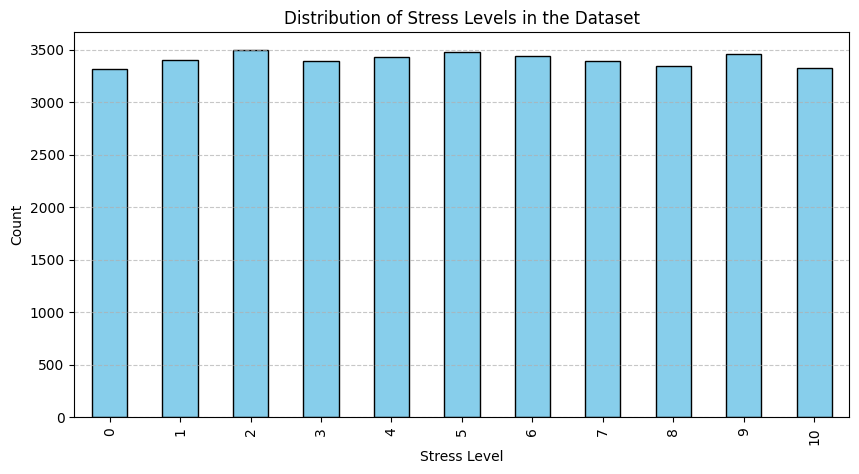

In [466]:
# Check target variable distribution
plt.figure(figsize=(10, 5))
df["Stress_Level"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Levels in the Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Stress_Level
2     9.322192
5     9.282148
9     9.226087
6     9.186043
4     9.151339
1     9.073921
7     9.055234
3     9.044555
8     8.924424
10    8.887050
0     8.847006
Name: proportion, dtype: float64


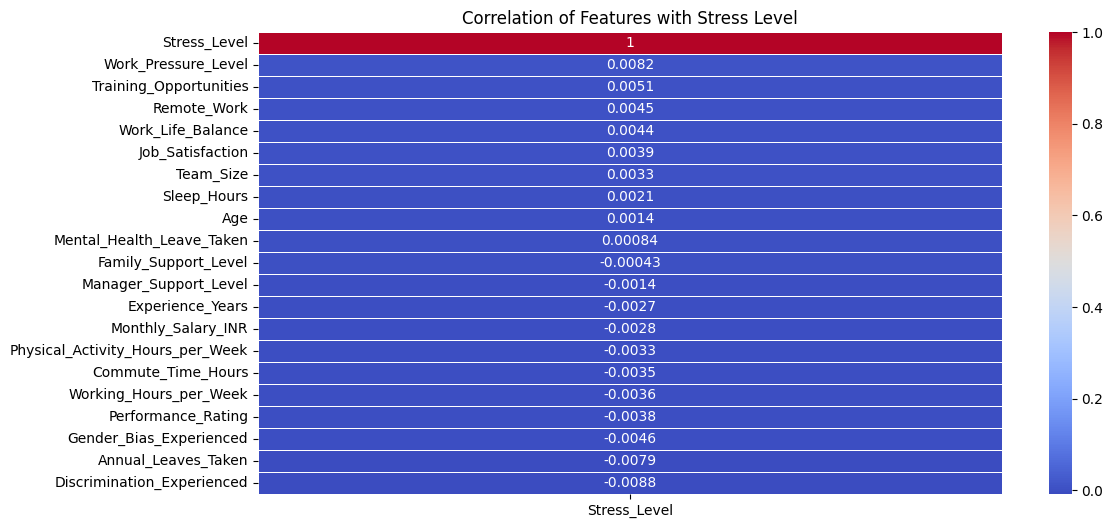

In [467]:
# Display class distribution percentage
print(df["Stress_Level"].value_counts(normalize=True) * 100)

# Compute and visualize feature correlations with Stress_Level
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix[["Stress_Level"]].sort_values(by="Stress_Level", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation of Features with Stress Level")
plt.show()

In [468]:
# Display top correlated features (absolute correlation > 0.1)
print(corr_matrix["Stress_Level"].abs().sort_values(ascending=False)[1:].head(10))

Discrimination_Experienced    0.008787
Work_Pressure_Level           0.008227
Annual_Leaves_Taken           0.007915
Training_Opportunities        0.005132
Gender_Bias_Experienced       0.004582
Remote_Work                   0.004459
Work_Life_Balance             0.004430
Job_Satisfaction              0.003898
Performance_Rating            0.003782
Working_Hours_per_Week        0.003638
Name: Stress_Level, dtype: float64


In [469]:
# Convert boolean columns to integers
df.replace({True: 1, False: 0}, inplace=True)

<ipython-input-469-0fe077d8d71f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True: 1, False: 0}, inplace=True)


In [470]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [471]:
# Display dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (37459, 29)


In [472]:
# Encode boolean variables
boolean_cols = df.select_dtypes(include=['bool']).columns
df[boolean_cols] = df[boolean_cols].astype(int)

In [473]:
# Reduce dataset size to 5,000 samples for processing efficiency
df_sampled = df.sample(n=5000, random_state=42)

In [474]:
# Separate features and target
X = df_sampled.drop(columns=["Stress_Level"])
y = df_sampled["Stress_Level"]

In [475]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [476]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

In [477]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [478]:
# Train Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [479]:
# Predict and evaluate accuracy
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [480]:
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 7.00%


In [481]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [482]:
# Predict and evaluate model accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [483]:
print(f" Decision Tree Accuracy: {accuracy * 100:.2f}%")

 Decision Tree Accuracy: 10.80%


In [484]:
# Train SVM with linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [485]:
# Evaluate SVM model
svm_accuracy = svm_model.score(X_test, y_test) * 100

In [486]:
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

SVM Accuracy: 11.00%


In [487]:
# Initialize KNN with default parameters
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [488]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

In [489]:
print(f"KNN Accuracy: {accuracy:.2f}%")

KNN Accuracy: 10.80%


In [490]:
# Predict on test data
y_pred = knn.predict(X_test)

In [491]:
# Train Logistic Regression model
clf_logistic = LogisticRegression(max_iter=500, random_state=42)
clf_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [492]:
# Predictions
y_pred = clf_logistic.predict(X_test)

In [493]:
# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)

In [494]:
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 9.00%
